(eigen)=
# 特征值和特征向量

```{index} single: 特征值和特征向量
```

## 概述

特征值和特征向量是线性代数中相对高级的主题。

同时，这些概念对于

* 经济建模（特别是动态！）
* 统计学
* 一些应用数学部分
* 机器学习
* 以及许多其他科学领域

非常有用。

在本讲座中，我们解释特征值和特征向量的基础知识，并介绍Neumann级数引理。

我们假设学生已经熟悉矩阵，并理解 {doc}`矩阵代数的基础<linear_equations>`。

我们将使用以下导入：

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import matrix_power
from matplotlib.lines import Line2D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

图像输入功能：已启用

(matrices_as_transformation)=
## 矩阵作为变换

让我们从讨论一个关于矩阵的重要概念开始。

### 向量到向量的映射

一种思考矩阵的方式是将其视为一个由数字组成的矩形集合。

另一种思考矩阵的方式是将其视为将向量变换为新向量的*映射*（即函数）。

为了理解第二种观点，假设我们将一个 $n \times m$ 的矩阵 $A$ 与一个 $m \times 1$ 的列向量 $x$ 相乘，得到一个 $n \times 1$ 的列向量 $y$：

$$
    Ax = y
$$

如果我们固定 $A$ 并考虑不同的 $x$ 选择，我们可以将 $A$ 视为一个将 $x$ 变换为 $Ax$ 的映射。

因为 $A$ 是 $n \times m$，它将 $m$ 维的向量变换为 $n$ 维的向量。

我们可以正式地写成 $A \colon \mathbb{R}^m \rightarrow \mathbb{R}^n$。

你可能会认为，如果 $A$ 是一个函数，那么我们应该写成 $A(x) = y$ 而不是 $Ax = y$，但第二种符号更为常见。

### 方阵

让我们将讨论限制在方阵上。

在上述讨论中，这意味着 $m=n$ 并且 $A$ 将 $\mathbb R^n$ 映射到自身。

这意味着 $A$ 是一个 $n \times n$ 的矩阵，将 $\mathbb{R}^n$ 中的向量 $x$ 变换为 $\mathbb{R}^n$ 中的新向量 $y=Ax$。

以下是一个例子：

$$
    \begin{bmatrix}
        2 & 1 \\
        -1 & 1
    \end{bmatrix}
    \begin{bmatrix}
        1 \\
        3
    \end{bmatrix}
    =
    \begin{bmatrix}
        5 \\
        2
    \end{bmatrix}
$$

这里，矩阵

$$
    A = \begin{bmatrix} 2 & 1 \\ 
                        -1 & 1 
        \end{bmatrix}
$$

将向量 $x = \begin{bmatrix} 1 \\ 3 \end{bmatrix}$ 变换为向量 $y = \begin{bmatrix} 5 \\ 2 \end{bmatrix}$。

让我们使用 Python 进行可视化：

In [2]:
A = np.array([[2,  1],
              [-1, 1]])

NameError: name 'sqrt' is not defined

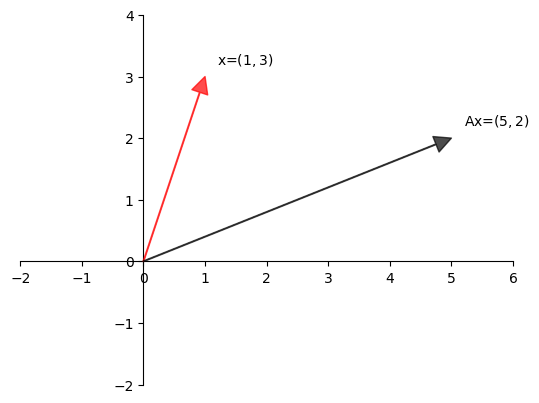

In [3]:
x = np.array([1, 3])
y = A @ x
fig, ax = plt.subplots()
# 通过原点设置轴

for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.set(xlim=(-2, 6), ylim=(-2, 4), aspect=1)

vecs = ((1, 3), (5, 2))
c = ['r', 'black']
for i, v in enumerate(vecs):
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(color=c[i],
                shrink=0,
                alpha=0.7,
                width=0.5))

ax.text(0.2 + 1, 0.2 + 3, 'x=$(1,3)$')
ax.text(0.2 + 5, 0.2 + 2, 'Ax=$(5,2)$')

ax.annotate('', xy=(sqrt(10/29) * 5, sqrt(10/29) * 2), xytext=(0, 0),
            arrowprops=dict(color='purple',
                            shrink=0,
                            alpha=0.7,
                            width=0.5))

ax.annotate('', xy=(1, 2/5), xytext=(1/3, 1),
            arrowprops={'arrowstyle': '->',
                        'connectionstyle': 'arc3,rad=-0.3'},
            horizontalalignment='center')
ax.text(0.8, 0.8, f'θ', fontsize=14)

plt.show()

可以通过以下计算进行验证：

In [ ]:
print(y)

此图展示了如何将向量 $x$ 映射到由矩阵 $A$ 变换的向量 $y$。

了解这种图示有助于理解线性变换的影响。

一种理解这种变换的方法是 $A$

* 首先将 $x$ 旋转某个角度 $\theta$
* 然后将其缩放为某个标量 $\gamma$，以获得 $x$ 的图像 $y$。

## 变换类型

让我们检查一些可以用矩阵执行的标准变换。

下面我们通过将向量思考为点而不是箭头来可视化变换。

我们考虑一个给定矩阵如何变换

* 一个点网格和
* 一组位于 $\mathbb{R}^2$ 中单位圆上的点。

为了构建这些变换，我们将使用两个函数，分别称为 `grid_transform` 和 `circle_transform`。

每个函数都可视化给定 $2 \times 2$ 矩阵 $A$ 的操作。

In [ ]:
import numpy as np

def colorizer(x, y):
    r = min(1, 1-y/3)
    g = min(1, 1+y/3)
    b = 1/4 + x/16
    return (r, g, b)


def grid_transform(A=np.array([[1, -1], [1, 1]])):
    xvals = np.linspace(-4, 4, 9)
    yvals = np.linspace(-3, 3, 7)
    xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])
    uvgrid = A @ xygrid

    colors = list(map(colorizer, xygrid[0], xygrid[1]))

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    for axes in ax:
        axes.set(xlim=(-11, 11), ylim=(-11, 11))
        axes.set_xticks([])
        axes.set_yticks([])
        for spine in ['left', 'bottom']:
            axes.spines[spine].set_position('zero')
        for spine in ['right', 'top']:
            axes.spines[spine].set_color('none')

    # 绘制 x-y 网格点
    ax[0].scatter(xygrid[0], xygrid[1], s=36, c=colors, edgecolor="none")
    # ax[0].grid(True)
    # ax[0].axis("equal")
    ax[0].set_title("点 $x_1, x_2, \cdots, x_k$")

    # 绘制变换后网格点
    ax[1].scatter(uvgrid[0], uvgrid[1], s=36, c=colors, edgecolor="none")
    # ax[1].grid(True)
    # ax[1].axis("equal")
    ax[1].set_title("点 $Ax_1, Ax_2, \cdots, Ax_k$")

    plt.show()

    
def circle_transform(A=np.array([[-1, 2], [0, 1]])):

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    for axes in ax:
        axes.set(xlim=(-4, 4), ylim=(-4, 4))
        axes.set_xticks([])
        axes.set_yticks([])
        for spine in ['left', 'bottom']:
            axes.spines[spine].set_position('zero')
        for spine in ['right', 'top']:
            axes.spines[spine].set_color('none')

    θ = np.linspace(0, 2 * np.pi, 150)
    r = 1

    θ_1 = np.empty(12)
    for i in range(12):
        θ_1[i] = 2 * np.pi * (i/12)

    x = r * np.cos(θ)
    y = r * np.sin(θ)
    a = r * np.cos(θ_1)
    b = r * np.sin(θ_1)
    a_1 = a.reshape(1, -1)
    b_1 = b.reshape(1, -1)
    colors = list(map(colorizer, a, b))
    ax[0].plot(x, y, color='black', zorder=1)
    ax[0].scatter(a_1, b_1, c=colors, alpha=1, s=60,
                  edgecolors='black', zorder=2)
    ax[0].set_title("单位圆在 $\mathbb{R}^2$ 中")

    x1 = x.reshape(1, -1)
    y1 = y.reshape(1, -1)
    ab = np.concatenate((a_1, b_1), axis=0)
    transformed_ab = A @ ab
    transformed_circle_input = np.concatenate((x1, y1), axis=0)
    transformed_circle = A @ transformed_circle_input
    ax[1].plot(transformed_circle[0, :],
               transformed_circle[1, :], color='black', zorder=1)
    ax[1].scatter(transformed_ab[0, :], transformed_ab[1:,],
                  color=colors, alpha=1, s=60, edgecolors='black', zorder=2)
    ax[1].set_title("变换后的圆")

    plt.show()

### 缩放

形如

$$
    \begin{bmatrix} 
        \alpha & 0 
        \\ 0 & \beta 
    \end{bmatrix}
$$

的矩阵在 x 轴方向上按因子 $\alpha$ 缩放向量，在 y 轴方向上按因子 $\beta$ 缩放向量。

这里我们展示了 $\alpha = \beta = 3$ 的简单例子。

In [ ]:
A = np.array([[3, 0],  # 缩放 3 倍
              [0, 3]])
grid_transform(A)
circle_transform(A)

### 旋转

形如

$$
    \begin{bmatrix} 
        \cos(\theta) & -\sin(\theta) 
        \\ \sin(\theta) & \cos(\theta) 
    \end{bmatrix}
$$

的矩阵将向量旋转 $ \theta$ 弧度。

以下是 $\theta = \pi/4$ 的例子。

In [ ]:
θ = np.pi/4 
A = np.array([[np.cos(θ), -np.sin(θ)], # 旋转 θ = π/4
              [np.sin(θ), np.cos(θ)]])
grid_transform(A)
circle_transform(A)

(matrices_as_rotation)=
### 旋转

形如

$$
    \begin{bmatrix} 
        \cos \theta & \sin \theta 
        \\ - \sin \theta & \cos \theta 
    \end{bmatrix}
$$

的矩阵被称为 _旋转矩阵_。

这个矩阵将向量按顺时针方向旋转 $\theta$ 角度。

In [ ]:
θ = np.pi/4  # 顺时针旋转45度
A = np.array([[np.cos(θ), np.sin(θ)],
              [-np.sin(θ), np.cos(θ)]])
grid_transform(A)

### 镜像

形如

$$
    \begin{bmatrix} 
        1 & 0 
        \\ 0 & -1 
    \end{bmatrix}
$$

的矩阵将向量映射到 y 轴，并翻转所有 x 方向的分量。

In [ ]:
A = np.array([[1, 0],  # 镜像
              [0, -1]])
grid_transform(A)
circle_transform(A)

### 置换

置换矩阵

$$
    \begin{bmatrix} 
        0 & 1 
        \\ 1 & 0 
    \end{bmatrix}
$$

交换向量的坐标。

In [ ]:
A = np.column_stack([[0, 1], [1, 0]])
grid_transform(A)

## 更多矩阵操作

更多实际与理论中的常见变换矩阵可以查看[这里](https://en.wikipedia.org/wiki/Transformation_matrix#Examples_in_2_dimensions)。

## 矩阵乘法作为组合

由于矩阵作为函数将一个向量变换为另一个向量，因此我们也可以将函数组合的概念应用于矩阵。

### 线性组合

考虑两个矩阵

$$
    A = 
        \begin{bmatrix} 
            0 & 1 \\ 
            -1 & 0 
        \end{bmatrix}
        \quad \text{和} \quad
    B = 
        \begin{bmatrix} 
            1 & 2 \\ 
            0 & 1 
        \end{bmatrix}
$$ 

当我们试图求得 $ABx$ 时，结果会是什么？ 假定某个 $2 \times 1$ 向量 $x$？

$$
\color{red}{\underbrace{
 \color{black}{\begin{bmatrix}
  0 & 1 \\
 -1 & 0
 \end{bmatrix}}
}_{\textstyle A} }
\color{red}{\underbrace{
 \color{black}{\begin{bmatrix}
  1 & 2 \\
  0 & 1
 \end{bmatrix}}
}_{\textstyle B}}
\color{red}{\overbrace{
 \color{black}{\begin{bmatrix}
  1 \\
  3
 \end{bmatrix}}
}^{\textstyle x}}
\rightarrow
\color{red}{\underbrace{
 \color{black}{\begin{bmatrix}
  0 & 1 \\
  -1 & -2
 \end{bmatrix}}
}_{\textstyle AB}}
\color{red}{\overbrace{
 \color{black}{\begin{bmatrix}
  1 \\
  3
 \end{bmatrix}}
}^{\textstyle x}}
\rightarrow
\color{red}{\overbrace{
 \color{black}{\begin{bmatrix}
  3 \\
  -7
 \end{bmatrix}}
}^{\textstyle y}}
$$

$$
\color{red}{\underbrace{
 \color{black}{\begin{bmatrix}
  0 & 1 \\
 -1 & 0
 \end{bmatrix}}
}_{\textstyle A} }
\color{red}{\underbrace{
 \color{black}{\begin{bmatrix}
  1 & 2 \\
 0 & 1
 \end{bmatrix}}
}_{\textstyle B}}
\color{red}{\overbrace{
 \color{black}{\begin{bmatrix}
  1 \\
  3
 \end{bmatrix}}
}^{\textstyle x}}
\rightarrow
\color{red}{\underbrace{
 \color{black}{\begin{bmatrix}
  0 & 1 \\
 -1 & 0
 \end{bmatrix}}
}_{\textstyle A}}
\color{red}{\overbrace{
 \color{black}{\begin{bmatrix}
  7 \\
  3
 \end{bmatrix}}
}^{\textstyle Bx}}
\rightarrow
\color{red}{\overbrace{
 \color{black}{\begin{bmatrix}
  3 \\
  -7
 \end{bmatrix}}
}^{\textstyle y}}
$$

我们可以观察到，对向量 $x$ 应用 $AB$ 变换的结果与先对 $x$ 应用 $B$，然后对向量 $Bx$ 应用 $A$ 是相同的。

因此，矩阵乘积 $AB$ 就是矩阵变换 $A$ 和 $B$ 的[组合](https://en.wikipedia.org/wiki/Function_composition)。

这意味着先应用变换 $B$，然后应用变换 $A$。

当我们将一个 $n \times m$ 矩阵 $A$ 与一个 $m \times k$ 矩阵 $B$ 相乘时，得到的矩阵乘积是一个 $n \times k$ 矩阵 $AB$。

因此，如果 $A$ 和 $B$ 是这样的变换：$A \colon \mathbb{R}^m \to \mathbb{R}^n$ 和 $B \colon \mathbb{R}^k \to \mathbb{R}^m$，那么 $AB$ 将 $\mathbb{R}^k$ 变换为 $\mathbb{R}^n$。

将矩阵乘法视为映射的组合帮助我们理解在矩阵乘法下，$AB$ 一般不等于 $BA$ 的原因。

（毕竟，当我们组合函数时，顺序通常是重要的。）

### 示例
图像输入功能：已启用

让 $A$ 是由 $\begin{bmatrix} 0 & 1 \\ -1 & 0 \end{bmatrix}$ 给出的 $90^{\circ}$ 顺时针旋转矩阵，并且让 $B$ 是沿 x 轴的
剪切矩阵 $\begin{bmatrix} 1 & 2 \\ 0 & 1 \end{bmatrix}$。

我们将可视化当我们应用变换 $AB$ 和 $BA$ 时点网格的变化。

In [ ]:
def grid_composition_transform(A=np.array([[1, -1], [1, 1]]),
                               B=np.array([[1, -1], [1, 1]])):
    xvals = np.linspace(-4, 4, 9)
    yvals = np.linspace(-3, 3, 7)
    xygrid = np.column_stack([[x, y] for x in xvals for y in yvals])
    uvgrid = B @ xygrid
    abgrid = A @ uvgrid

    colors = list(map(colorizer, xygrid[0], xygrid[1]))

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    for axes in ax:
        axes.set(xlim=(-12, 12), ylim=(-12, 12))
        axes.set_xticks([])
        axes.set_yticks([])
        for spine in ['left', 'bottom']:
            axes.spines[spine].set_position('zero')
        for spine in ['right', 'top']:
            axes.spines[spine].set_color('none')

    # 绘制网格点
    ax[0].scatter(xygrid[0], xygrid[1], s=36, c=colors, edgecolor="none")
    ax[0].set_title("点 $x_1, x_2, \cdots, x_k$")

    # 绘制中间网格点
    ax[1].scatter(uvgrid[0], uvgrid[1], s=36, c=colors, edgecolor="none")
    ax[1].set_title("点 $Bx_1, Bx_2, \cdots, Bx_k$")

    # 绘制变换后的网格点
    ax[2].scatter(abgrid[0], abgrid[1], s=36, c=colors, edgecolor="none")
    ax[2].set_title("点 $ABx_1, ABx_2, \cdots, ABx_k$")

    plt.show()

In [ ]:
A = np.array([[0, 1],     # 90度顺时针旋转
              [-1, 0]])
B = np.array([[1, 2],     # 沿 x 轴剪切
              [0, 1]])
grid_composition_transform(A, B) # 先 B 后 A
grid_composition_transform(B, A) # 先 A 后 B

让我们总结一下。

(`grid_composition_transform(A, B)` 变化与 `grid_composition_transform(B, A)` 变化的不同展示了矩阵的顺序对组合结果的影响。)

正如你所见，这些变化的顺序很重要：$AB \neq BA$。

### 特征值和特征向量

在对二次方程的解进行扩展的过程中，特征值和特征向量提供了关键的内容。

特征值可以被认为是描述矩阵变换某个集合中向量拉伸因子的一组刻度。

特征向量则是随着这个拉伸因子应用时向量本身（不会改变方向）的描述。

从应用的角度，特征值和特征向量通过提供对矩阵描述变换性质的深刻理解，揭示了诸如如何将矩阵分解成简单部分以便于处理的能力。

这些纯数学概念有实际的应用，包括：

- 动力系统稳定性分析
- 在机器学习中的主成分分析（PCA）
- 图像处理和计算机视觉
- 量子力学中的厄米算子

这些只代表了一部分应用。

理解特征值和特征向量的概念可能会让我们对于很多线性代数应用的框架有更深刻的见解。

#### 旋转然后剪切

In [ ]:
grid_composition_transform(B,A)         # transformation BA

图像输入功能：已启用

### 在固定映射上迭代

在经济学（尤其是动态建模）中，我们经常更感兴趣的是分析多次应用固定矩阵的行为。

例如，给定一个向量 $v$ 和一个矩阵 $A$，我们感兴趣的是研究序列

$$ 
    v, \quad
    Av, \quad
    AAv = A^2v, \quad \ldots
$$

让我们首先看看不同矩阵 $A$ 下的迭代 $(A^k v)_{k \geq 0}$ 序列的示例。

In [ ]:
def plot_series(A, v, n):

    B = np.array([[1, -1],
                  [1, 0]])

    fig, ax = plt.subplots()

    ax.set(xlim=(-4, 4), ylim=(-4, 4))
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    θ = np.linspace(0, 2 * np.pi, 150)
    r = 2.5
    x = r * np.cos(θ)
    y = r * np.sin(θ)
    x1 = x.reshape(1, -1)
    y1 = y.reshape(1, -1)
    xy = np.concatenate((x1, y1), axis=0)

    ellipse = B @ xy
    ax.plot(ellipse[0, :], ellipse[1, :], color='black',
            linestyle=(0, (5, 10)), linewidth=0.5)

    # 初始化轨迹的持有者
    colors = plt.cm.rainbow(np.linspace(0, 1, 20))

    for i in range(n):
        iteration = matrix_power(A, i) @ v
        v1 = iteration[0]
        v2 = iteration[1]
        ax.scatter(v1, v2, color=colors[i])
        if i == 0:
            ax.text(v1+0.25, v2, f'$v$')
        elif i == 1:
            ax.text(v1+0.25, v2, f'$Av$')
        elif 1 < i < 4:
            ax.text(v1+0.25, v2, f'$A^{i}v$')
    plt.show()

接下来，考虑以下例子

In [ ]:
A = np.array([[sqrt(3) + 1, -2],
              [1, sqrt(3) - 1]])
A = (1/(2*sqrt(2))) * A
v = (-3, -3)
n = 12

plot_series(A, v, n)

观察这些向量如何更接近原点。

在其他情况下，向量将缓慢移动到无穷远。

现在处理 $A$ 被设为

In [ ]:
A = np.array([[sqrt(3) + 1, -2],
              [1, sqrt(3) - 1]])
A = (1/sqrt(2)) * A
v = (-3, -3)
n = 12

plot_series(A, v, n)

在这种情况下，每次迭代后向量的长度既不偏长也不偏短。虽然向量没被缩短或拉长，但它们被旋转。这意味着多次乘以矩阵不仅涉及对基本向量的拉伸，还涉及到沿特定路径的偏转。

### 例子 1：椭圆旋转

在这个例子中，向量随着每次迭代不断的被旋转。

In [ ]:
B = np.array([[sqrt(3) + 1, -2],
              [1, sqrt(3) - 1]])
B = (1/sqrt(2)) * B
v = (-1, -0.25)
n = 6

plot_series(B, v, n)

图像输入功能：已启用

### 示例 2：向外螺旋

在这里随着每次迭代，向量逐渐变长，即远离原点

In [ ]:
A = np.array([[sqrt(3) + 1, -2],
              [1, sqrt(3) - 1]])
v = (-1, -0.25)
n = 12

plot_series(A, v, n)

在这种情况下，不断将向量乘以 $A$ 会使向量“向外螺旋”。

因此我们观察到序列 $(A^kv)_{k \geq 0}$ 的行为取决于映射 $A$ 本身。

现在我们来讨论决定这种行为的 $A$ 的特性。

(la_eigenvalues)=
## 特征值

```{index} single: 线性代数; 特征值
```

在本节中，我们介绍特征值和特征向量的概念。

### 定义

设 $A$ 为一个 $n \times n$ 的方阵。

如果 $\lambda$ 是一个标量且 $v$ 是一个非零的 n 维向量，满足

$$
A v = \lambda v.
$$

那么我们说 $\lambda$ 是 $A$ 的一个*特征值*，而 $v$ 是与其对应的*特征向量*。

因此，$A$ 的特征向量是一个非零向量 $v$，使得当映射 $A$ 被应用时，$v$ 只是被缩放了。

下图显示了两个特征向量（蓝色箭头）及其在 $A$ 下的像（红色箭头）。

如预期那样，每个 $v$ 的像 $Av$ 只是原始向量的缩放版本。

In [ ]:
from numpy.linalg import eig

A = [[1, 2],
     [2, 1]]
A = np.array(A)
evals, evecs = eig(A)
evecs = evecs[:, 0], evecs[:, 1]

fig, ax = plt.subplots(figsize=(10, 8))
# 通过原点设置轴
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

xmin, xmax = -3, 3
ymin, ymax = -3, 3
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# 绘制每个特征向量
for v in evecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.6,
                width=0.5))

# 绘制每个特征向量的像
for v in evecs:
    v = A @ v
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='red',
                shrink=0,
                alpha=0.6,
                width=0.5))

# 绘制它们经过的线
x = np.linspace(xmin, xmax, 3)
for v in evecs:
    a = v[1] / v[0]
    ax.plot(x, a * x, 'b-', lw=0.4)

plt.show()

在上面的图中，矩阵 $A$ 及其特征向量由以下关系给出：

$$
    A
    \begin{bmatrix}
        -1 \\ 1
    \end{bmatrix}
    =
    \lambda_1 
    \begin{bmatrix}
        -1 \\ 1
    \end{bmatrix}
$$

和

$$
    A
    \begin{bmatrix}
        1 \\ 1
    \end{bmatrix}
    =
    \lambda_2 
    \begin{bmatrix}
        1 \\ 1
    \end{bmatrix}
$$

其中

$$
    \lambda_1 = 3, \quad \lambda_2 = -1
$$

### 解决 $\lambda$ 和 $v$ 

还有一点非常重要的是：

* $A$ 的特征向量 $v$ 的规模（即范数）是任意的。

特别是， $\alpha v, \alpha \neq 0$，是满足 $A v = \lambda v$ 的特征向量的任意标量倍。

让我们看看此观察如何帮助我们找到 $A$ 的特征值和特征向量。

假设 $A v = \lambda v$。

这表明

$$
    A v - \lambda v = 0
$$

等价于

$$
    (A - \lambda I) v = 0
$$

其中 $I$ 是一个 $n \times n$ 单位矩阵。

因为 $v \neq 0$， 这个等式只可能在 $(A - \lambda I)$ 是*奇异的* 时候成立，或者说 $\det(A - \lambda I) = 0$。

因此，$\lambda$ 是满足 $\det(A - \lambda I) = 0$ 的所有值的求解结果。

这些是 $A$ 的特征值。

对于每个特征值 $\lambda$ ， 特征向量 $v$ 是满足上述 $det$ 等式的向量。

另一个推论是，如果 $A$ 是一个 $n \times n$ 的矩阵，那么 $A$ 一定有 $n$ 个特征值。

此外，如果我们任意选择一个特征向量 $v_1$ ，然后将其代入 $A v_1 = \lambda_1 v_1$ 以求解所有可能的 $\lambda_1$，可以找到所有可能的 $v_1$。

通过这种方式，我们找到从属 $A$ 的每个 $\lambda$ 的所有 $v$。

### Python 示例

这里有一个关于如何找到特征值和特征向量的 Python 示例。

In [ ]:
A = np.array([[1, 2],
              [2, 1]])
evals, evecs = eig(A)

print("特征值:", evals)
print('---')
print("特征向量:\n", evecs)

输出的特征值对应的特征向量可以通过

In [ ]:
evals[0]
evecs[:, 0]

### 复杂值

到目前为止，我们对特征值和特征向量的定义看起来很直观。

然而有一个我们没有提及的复杂情况：

当我们求解 $Av = \lambda v$ 时，

* $\lambda$ 可以是一个复数，
* $v$ 可以是一个复数的 $n$ 维向量。

我们将看到一些例子。

### 一些数学细节

我们注意到一些面向高级读者的数学细节。

（其他读者可以跳到下一节）

特征值方程等价于 $(A - \lambda I) v = 0$。

这个方程只有当 $A - \lambda I$ 的列线性相关时才会有非零解 $v$。

这又等价于行列式为零。

因此，要找到所有特征值，我们可以找使得 $A - \lambda I$ 的行列式为零的 $\lambda$。

该问题可以表示为求解 $\lambda$ 的一个多项式根问题，该多项式在 $\lambda$ 中的次数为 $n$。

这又意味着存在复平面上的 $n$ 个解，虽然有些可能会重复。

### 事实

关于方阵 $A$ 的特征值，有一些令人愉快的事实如下：

1. 矩阵 $A$ 的行列式等于特征值的乘积
2. 矩阵 $A$ 的迹（主对角线上元素的和）等于特征值的和
3. 如果 $A$ 是对称矩阵，那么它的所有特征值都是实数
4. 如果 $A$ 是可逆的并且其特征值是 $\lambda_1, \ldots, \lambda_n$ ，则 $A^{-1}$ 的特征值是 $1/\lambda_1, \ldots, 1/\lambda_n$。

最后一条的推论是，当且仅当矩阵的所有特征值都非零时，矩阵是可逆的。

### 计算

使用 NumPy，我们可以求解矩阵的特征值和特征向量，如下所示：

In [ ]:
from numpy.linalg import eig

A = [[1, 2],
     [2, 1]]

A = np.array(A)
evals, evecs = eig(A)
evals  # 特征值

### 示例 3：阻止
In this instance, the vector sequence orbits around a fixed point without changing its magnitude, showing an oscillation.

In [ ]:
A = np.array([[sqrt(3) - 0.5, -1.5],
              [1.5, sqrt(3) + 0.5]])

v = [1, 0]
n = 20

plot_series(A, v, n)

### 以 NumPy 为例

在使用 NumPy 的示例中，我们可以计算特征值和特征向量，如下所示：

```{code-cell} ipython3
A = np.array([[1, 2],
              [2, 1]])
evals, evecs = eig(A)

print("特征值:", evals)
print('---')
print("特征向量:\n", evecs)

这些工具让我们可以继续观察矩阵的特征向量的变化。

### 数值问题

在实践中，计算特征值和特征向量总是存在数值问题，例如当矩阵接近奇异时。

在处理这些问题时，NumPy 通过使用 LAPACK 例程（线性代数库）提供了极好的数值稳定性。

### 总结

理解矩阵的特征值、特征向量及其性质是研究经济领域新微观和宏观经济政策影响的重要基础之一。

特别是在时间序列和结构建模中，它们帮助我们：

- 识别稳定或不稳定的状况，
- 预测长期趋势，
- 开发优化政策。

### 复数情况

我们还需要理解特征值和特征向量可能是复数。

如果 $\mathrm{det}(A - \lambda I) = 0$ 导致 $\lambda$ 是复数（即 $\lambda$ 具有虚部），则特征向量 $v$ 将相应地具有复数值分量。

例如，考虑矩阵 $A$ 是

$$
\begin{bmatrix}
    0 & -1\\
    1 & 0
\end{bmatrix}
$$

我们将使用 NumPy 来计算它的特征值和特征向量：

In [ ]:
A = np.array([[0, -1], [1, 0]])
evals, evecs = eig(A)
evals     # 特征值

将显示两个纯虚特征值 $\pm i$，即 $\pm \sqrt{-1}$。

这些虚特征值表示矩阵 $A$ 的旋转性质。

计算所得的特征向量将对应于虚特征值。

In [ ]:
evecs[:, 0]

将显示一个与特征值 $i$ 相关联的复值特征向量。

同理，类似的特征向量数量也将与特征值 $-i$ 相关联。

### 关于这些定理的补充说明

如果多次施加矩阵变换（即重复进行乘法），则传统上称之为动力系统。

矩阵 $A$ 的特征值和特征向量提供了捕获该系统行为的重要信息。

这些工具有多种应用：

- 预测经济模型的长期稳定性和反应，
- 改善病理学动物实验的前景分析，
- 以及识别传递矩阵的震动模式。

## 谢谢

希望大家在学习这些概念过程中不断发现新的知识点。

希望本章对大家有所帮助！

## Neumann级数引理

让我们考虑更一般的工程：在迭代变化法中。

### 引入矩阵迭代

在工程中，我们经常遇到的主题是「不断应用相同的矩阵」这一操作。

比如，假设我们进行如下迭代：

$$
b, Ab, A^2b, A^3b, \cdots
$$

这种情况下，我们希望知道这种操作收敛的情况。

### Neumann级数引理

如果${A}$是一个我们关注的矩阵，并且如果光谱半径$\rho(A)$小于1 (即所有特征值的绝对值均小于1)，那么抛开某些技术条件：

$$
\left(I- A\right)^{-1} 
=
\sum_{k=0}^{\infty} A^k.
$$

等式右边即Neumann级数的收敛。

换句话说，只要$A$具有适当的特征值，则

$$
\sum_{k=0}^{\infty} A^k
$$

将以其逆矩阵$I - A$定义。

### Neumann级数引理的应用

让我们解释一些这一定理在实际中如何使用的例子。

### 数值示例

假设我们有以下矩阵定义:

$$
A
= 
\begin{bmatrix} 
\frac{1}{4} & 0.15 
\\ 
0.10 & \frac{1}{5}
\end{bmatrix}.
$$

我们计算对应的特征值来验证矩阵特性。

In [ ]:
A = np.array([[1/4, 0.15],
              [0.10, 1/5]])
evals, evecs = eig(A)

print("特征值:", evals)
print('---')
print("特征向量:\n", evecs)

根据计算的特征值，可以得到光谱半径$r(A)$小于1。

因此我们应用引理，得到：

$$
\left(I -A\right)^{-1}=\sum_{k=0}^{\infty}A^k.
$$

In [ ]:
I = np.identity(2)  # 2 x 2 单位矩阵
B = I - A

In [ ]:
B_inverse = np.linalg.inv(B)  # 直接求逆方法
sum_approximation = np.zeros((2, 2))  # 初始为零矩阵
max_iter = 1000

for i in range(max_iter):
    sum_approximation += np.linalg.matrix_power(A, i)

print(f'直接求逆：\n{B_inverse}\n\n'
      f'Neumann级数近似：\n{sum_approximation}\n\n'
      f'误差：\n{np.abs(B_inverse - sum_approximation)}\n')

由此我们看到：

通过迭代方法得到的近似值与直接求逆值非常接近。

## 结论

特征值和特征向量为我们理解矩阵变换提供了强有力的工具。

线性代数的这些高级概念在许多科学和工程领域都有广泛应用。

特别是在经济学中，它们帮助我们捕捉动态系统的所有重要行为。

本讲座介绍了特征值和特征向量的基础，并通过具体例子展示了它们在理解矩阵变换中特许的重要性。

还介绍了Neumann级数引理，以解决迭代矩阵操作的收敛问题。

希望你觉得这些内容有用，并鼓励继续探索这方面的其他应用和理论。

### 参考文献

* Gilbert Strang, *Linear Algebra and Learning from Data*, Wellesley-Cambridge Press, 2019.
* Kenneth A. Ross, Charles R. B. Wright, *Discrete Mathematics*, ISBN 0-13-046327-2.
* [Neumann Series](https://en.wikipedia.org/wiki/Neumann_series)

In [ ]:
A_sum = np.zeros((2, 2))  # 矩阵A的幂级数和
A_power = I
for i in range(50):
    A_sum += A_power
    A_power = A_power @ A

```

让我们检查一下求和方法和逆方法之间的等同性。

```{code-cell} ipython3
np.allclose(A_sum, B_inverse)
```

尽管我们在 $k = 50$ 时截断了无限和，但这两种方法给出了相同的结果，说明了 Neumann 级数引理的结果。

## 练习

```{exercise}
:label: eig1_ex1

幂迭代是一种找到对角化矩阵最大绝对特征值的方法。

该方法从一个随机向量 $b_0$ 开始，并反复将 $A$ 矩阵应用到它上

$$
b_{k+1}=\frac{A b_k}{\left\|A b_k\right\|}
$$

在[此处](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter15.02-The-Power-Method.html)可以找到该方法的详细讨论。

在本练习中，首先实现幂迭代方法，并使用它找到最大绝对特征值及其对应的特征向量。

然后可视化收敛。
```

```{solution-start} eig1_ex1
:class: dropdown
```

这是一个解决方案。

我们从观察特征向量近似值与真实特征向量之间的距离开始。

In [ ]:
# 定义一个矩阵A
A = np.array([[1, 0, 3],
              [0, 2, 0],
              [3, 0, 1]])

num_iters = 20

# 定义一个随机起始向量b
b = np.random.rand(A.shape[1])

# 获取矩阵A的主特征向量
eigenvector = np.linalg.eig(A)[1][:, 0]

errors = []
res = []

# 幂迭代循环
for i in range(num_iters):
    # 矩阵A乘以向量b
    b = A @ b
    # 归一化b
    b = b / np.linalg.norm(b)
    # 将b追加到特征向量近似值列表中
    res.append(b)
    err = np.linalg.norm(np.array(b)
                         - eigenvector)
    errors.append(err)

最大特征值 = np.dot(A @ b, b) / np.dot(b, b)
print(f'近似最大绝对特征值是 \
        {最大特征值:.2f}')
print('真实特征值是', np.linalg.eig(A)[0])

# 绘制每次迭代的特征向量近似值
plt.figure(figsize=(10, 6))
plt.xlabel('迭代次数')
plt.ylabel('误差')
_ = plt.plot(errors)

那么我们可以看一下特征向量近似值的轨迹。

In [ ]:
# 设置3D图的图形和轴
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制特征向量
ax.scatter(eigenvector[0],
           eigenvector[1],
           eigenvector[2],
           color='r', s=80)

for i, vec in enumerate(res):
    ax.scatter(vec[0], vec[1], vec[2],
               color='b',
               alpha=(i+1)/(num_iters+1),
               s=80)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.tick_params(axis='both', which='major', labelsize=7)

points = [plt.Line2D([0], [0], linestyle='none',
                     c=i, marker='o') for i in ['r', 'b']]
ax.legend(points, ['实际特征向量',
                   r'近似特征向量 ($b_k$)'])
ax.set_box_aspect(aspect=None, zoom=0.8)

plt.show()

```{solution-end}
```

```{exercise}
:label: eig1_ex2

我们已经讨论了向量 $v$ 在被 $A$ 变换后的轨迹。

考虑矩阵 $A = \begin{bmatrix} 1 & 2 \\ 1 & 1 \end{bmatrix}$ 和向量 $v = \begin{bmatrix} 2 \\ -2 \end{bmatrix}$。

尝试计算向量 $v$ 在经过 $A$ 变换后的 $n=4$ 次迭代，并绘制结果。

```

```{solution-start} eig1_ex2
:class: dropdown
```

In [ ]:
A = np.array([[1, 2],
              [1, 1]])
v = (0.4, -0.4)
n = 11

# 计算特征向量和特征值
eigenvalues, eigenvectors = np.linalg.eig(A)

print(f'特征值:\n {eigenvalues}')
print(f'特征向量:\n {eigenvectors}')

plot_series(A, v, n)

```{solution-end}
```


### 在流场展示特征向量

最后，我们可以在流场上展示这些特征向量

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
A = np.array([[sqrt(3) + 1, -2],
              [1, sqrt(3) - 1]])
A = (1/(2*sqrt(2))) * A

# 计算右特征向量和特征值
eigenvalues, eigenvectors = np.linalg.eig(A)
print(f'特征值:\n {eigenvalues}')
print(f'特征向量:\n {eigenvectors}\n')

eigenvalues_real = eigenvalues.real
eigenvectors_real = eigenvectors.real

# 创建网格点
x, y = np.meshgrid(np.linspace(-20, 20, 15),
                   np.linspace(-20, 20, 20))

# 对向量场中的每个点应用矩阵A
vec_field = np.stack([x, y])
u, v = np.tensordot(A, vec_field, axes=1)

# 绘制变换后的向量场
c = ax.streamplot(x, y, u - x, v - y, density=1,
                  linewidth=None, color='#A23BEC')
c.lines.set_alpha(0.5)
c.arrows.set_alpha(0.5)

# 绘制特征向量
parameters = {'color': ['b', 'g'], 'angles': 'xy',
              'scale_units': 'xy', 'scale': 1,
              'width': 0.01, 'alpha': 0.5}
origin = np.zeros((2, len(eigenvectors)))
ax.quiver(*origin, eigenvectors_real[0],
          eigenvectors_real[1], **parameters)
ax.quiver(*origin,
          - eigenvectors_real[0],
          - eigenvectors_real[1],
          **parameters)

ax.set_xlabel("x轴")
ax.set_ylabel("y轴")
ax.grid()
ax.set_aspect('equal', adjustable='box')

plt.show()

### 3D 复数特征值和特征向量

让我们可视化复数特征值和特征向量。

向量场解释了为什么我们在之前观察到了 $v$ 的轨迹被反复乘以 $A$ 的迭代。

这里展示的模式是因为我们有复数特征值和特征向量。

我们可以使用从 [stackoverflow](https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-a-3d-plot) 获取的 `Arrow3D` 类来绘制某个矩阵的复平面。

In [ ]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d,
                                           self.axes.M)
        self.set_positions((0.1*xs[0], 0.1*ys[0]),
                           (0.1*xs[1], 0.1*ys[1]))

        return np.min(zs)


eigenvalues, eigenvectors = np.linalg.eig(A)

# 创建向量场的网格
x, y = np.meshgrid(np.linspace(-2, 2, 15),
                   np.linspace(-2, 2, 15))

# 计算向量场（实部和虚部）
u_real = A[0][0] * x + A[0][1] * y
v_real = A[1][0] * x + A[1][1] * y
u_imag = np.zeros_like(x)
v_imag = np.zeros_like(y)

# 创建 3D 图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
vlength = np.linalg.norm(eigenvectors)
ax.quiver(x, y, u_imag, u_real - x, v_real - y, v_imag - u_imag,
          colors='b', alpha=0.3, length=.2,
          arrow_length_ratio=0.01)

arrow_prop_dict = dict(mutation_scale=5,
                       arrowstyle='-|>', shrinkA=0, shrinkB=0)

# 绘制 3D 特征向量
for c, i in zip(['b', 'g'], [0, 1]):
    a = Arrow3D([0, eigenvectors[0][i].real],
                [0, eigenvectors[1][i].real],
                [0, eigenvectors[1][i].imag],
                color=c, **arrow_prop_dict)
    ax.add_artist(a)

# 设置轴标签和标题
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Im')
ax.set_box_aspect(aspect=None, zoom=0.8)

plt.draw()
plt.show()